---
title: Lecture 4
subtitle: Transforms
date: 2024-09-011
downloads:
  - file: 04_lecture.ipynb
    title: 04_lecture.ipynb
  - file: ../assets/04_lecture.pdf
    title: 04_lecture.pdf
---

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

Image transforms are used to isolate patterns of interest, represent data in a more compact form, and are reversible.

The learning objectives are:
- DFT for images
- DCT
- Haramord-Walsh transform
- Haar transform

## DFT for images

### 1D Case

The [Fourier transform](wiki:Fourier_transform)[^1] is an integral transform that takes a function as input and outputs another function that describes the extent to which various frequencies are present in the original function. It is defined in [Equation (%s)](#equ-FT) The output of the transform is a complex-valued function of frequency.

:::{prf:definition} Fourier Transform
:nonumber: True
$$
\label{equ-FT}
\hat{f}(\zeta) = \int^{\infty}_{-\infty} f(x)e^{-i2\pi\zeta x} dx
$$

where,

- $\hat{f}(\zeta)$ is the frequency-domain representation of the function $f(x)$
- $\zeta$ is the frequency variable
- $f(x)$ is the original function in the time or spatial domain
- $x$ is the time or spatial variable 
:::

The [IFT](wiki:Fourier_inversion_theorem) is used to transform data from the frequency domain back to the time or spatial domain, and is defined in [Equation (%s)](#equ-IFT).

:::{prf:definition} IFT
:nonumber: True
$$
\label{equ-IFT}
f(x) = \int_{-\infty}^{\infty} \hat{f}(\zeta) e^{i 2\pi \zeta x} \, d\zeta
$$
:::

The [DFT](wiki:Discrete_Fourier_transform) is the Fourier transform applied to discrete data. It operates on a finite sequence of equally spaced samples from a signal and is defined in [Equation (%s)](#equ-DFT).

:::{prf:definition} DFT
:nonumber: True
$$
\label{equ-DFT}
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i \frac{2\pi}{N} k n}
$$

where,

- $X[k]$ is the k-th frequency component of the input signal $x[n]$
- $k$ is the frequency index
- $x[n]$ is the signal input in the time or spatial domain
- $n$ is the sample index
:::

The [FFT](wiki:Fast_Fourier_transform) is an efficient algorithm to compute the DFT. It reduces the computational complexity of the DFT from $O(N^{2})$ to $O(N\log{N})$.

:::{note}
When using `np.fft.fft()` the function performs the DFT via the FFT algorithm.
:::

The IDFT is used when working with discrete data to convert the data from the frequency domain back to the time or spatial domain and is defined in [Equation (%s)](#equ-IDFT).

:::{prf:definition} IDFT
:nonumber: True
$$
\label{equ-IDFT}
f[n] = \frac{1}{N} \sum_{k=0}^{N-1} \hat{f}[k] e^{i \frac{2 \pi}{N} k n}
$$
:::

[^1]: The accompanying video does a great job describing the Fourier transform.
    :::{iframe} https://www.youtube.com/embed/spUNpyF58BY?si=siTxY9oE7mT2z1oX
    :::

#### Example

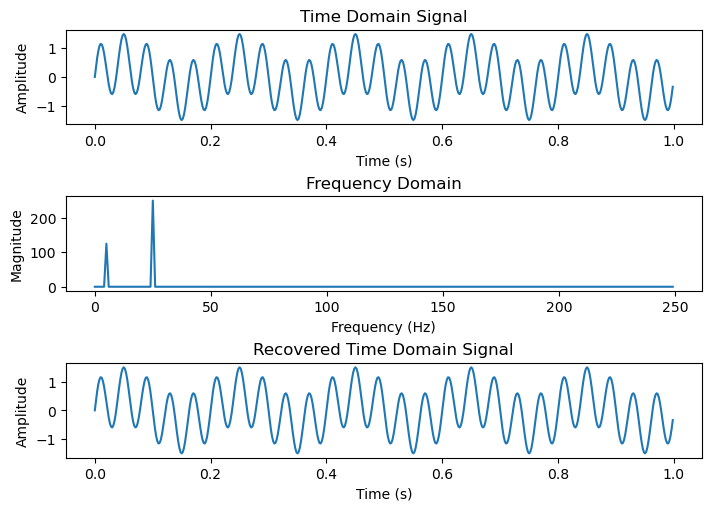

In [40]:
# define the time domain signal
sampling_rate = 500 # samples per second
T = 1.0 / sampling_rate # seconds per sample (sampling interval)
duration = 1.0
N = int(duration * sampling_rate) # samples
x = np.linspace(0.0, duration, N, endpoint=False) # False to account for 0-index

# create a signal composed of two difference sine waves
freq1 = 5
freq2 = 25
signal = 0.5 * np.sin(2.0 * np.pi * freq1 * x) + 1 * np.sin(2.0 * np.pi * freq2 * x)

# compute the DFT using FFT
fft_values = np.fft.fft(signal)

# real-valued signals have symmetric FTs, so just take the positive half of the spectrum
fft_mag = np.abs(fft_values)[:N // 2]
freqs = np.fft.fftfreq(N, T)[:N // 2]

# compute the Inverse Fourier Transform using IFFT
recovered_signal = np.fft.ifft(fft_values)

# plot the results
fig, axs = plt.subplots(3, 1, figsize=(7,5), layout='constrained')
axs[0].plot(x, signal); axs[0].set_title('Time Domain Signal')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[1].plot(freqs, fft_mag)
axs[1].set_title('Frequency Domain')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Magnitude')
axs[2].plot(x, recovered_signal); axs[2].set_title('Recovered Time Domain Signal')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Amplitude')
plt.show()

__Takeaways__

The time domain signal looks complex because of the superposition of two sine waves with different frequencies. In the frequency domain it is clear that the signal is composed of two frequencies (e.g., 5 Hz and 25 Hz). Lastly, the magnitude of the peaks in the frequency domain gives information on the relative strength of each frequency in the original signal.

### 2D Case

The Fourier transform for 2D is an integral transform that extends the 1D case to two dimensions. It takes a 2D function as the input and outputs another function that describes the extent to which various frequencies are present in the original 2D function.

The result is a complex-valued function representing the frequency domain in both dimensions and is defined in [Equation (%s)](#equ-2FT).

:::{prf:definition} 2D Fourier Transform
:nonumber: True
$$
\label{equ-2FT}
\hat{f}(u, v) = \int^{\infty}_{-\infty}\int^{\infty}_{-\infty}f(x,y)e^{-i2\pi (ux+uy)}\,dx\,dy
$$

where,

- $\hat{f}(u,v)$ is the frequency domain representation of the 2D function $f(x,y)$
- $u$ is the frequency variable in the horizontal direction
- $v$ is the frequency variable in the vertical direction
- $f(x,y)$ is the original function in the time or spatial domain
- $x$ and $y$ are the spatial variables

The 2D IFT is used to transform the data from the frequency domain back to the spatial domain and is defined in [Equation(%s)](#equ-2IFT).

:::{prf:definition} 2D IFT
:nonumber: True
$$
\label{equ-2IFT}
f(x,y) = \int^{\infty}_{-\infty}\int^{\infty}_{-\infty}\hat{f}(u,v)e^{i2\pi (ux + vy)} \, du \, dv
$$

where,

- $f(x,y)$ is the reconstructed function in the spatial domain
- $\hat{f}(u,v)$ is the frequency domain representation of the original function
- $u$ and $v$ are the frequency variables in the horizontal and vertical directions
- $x$ and $y$ are the spatial variables

The 2D DFT operates on a finite 2D grid of equally spaced samples and is defined in [Equation (%s)](#equ-2DFT).

:::{prf:definition} 2D DFT
:nonumber: True
$$
\label{equ-2DFT}
X[u, v] = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot e^{-i 2 \pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

where,

- $X[u,v]$ is the frequency component of the 2D signal $f(x,y)$
- $u$ and $v$ are the frequency indices in the horizontal and vertical directions
- $f(x,y)$ is the signal input in the 2D time or spatial domain
- $x$ and $y$ are the sample indices in the horizontal and vertical directions
- $M$ and $N$ are the dimensions of the 2D array (e.g., the number of rows and columns)

The 2D DFT can be represented in matrix form, which is commonly used in image processing. The 2D DFT is essentially two 1D DTS: one applied along the rows, and then one applied along the columns and is defined in [Equation (%s)](#equ-2DFTMat).

:::{prf:definition} 2D DFT Matrix Form
:nonumber: True
$$
\label{equ-2DFTMat}
X = F_M \cdot f \cdot F^{T}_N
$$

where,

- $X$ is the matrix representing the 2D DFT for the image
- $f$ is the original 2D signal (e.g., the image)
- $F_M$ is the DFT matrix for the rows
- $F^{T}_M$ is the transpose of the DFT matrix for the columns

$F_M$ and $F_N$ can be found from the following:

$$
\begin{equation*}
F = \frac{1}{\sqrt{n}} \begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & e^{-i 2 \pi \frac{1}{n}} & e^{-i 2 \pi \frac{2}{n}} & \cdots & e^{-i 2 \pi \frac{n-1}{n}} \\
1 & e^{-i 2 \pi \frac{2}{n}} & e^{-i 2 \pi \frac{4}{n}} & \cdots & e^{-i 2 \pi \frac{2(n-1)}{n}} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & e^{-i 2 \pi \frac{n-1}{n}} & e^{-i 2 \pi \frac{2(n-1)}{n}} & \cdots & e^{-i 2 \pi \frac{(n-1)(n-1)}{n}} \\
\end{bmatrix}
\end{equation*}
$$

The 2D IDFT is used to convert an image from the frequency domain back to the spatial domain to reconstruct the original signal and is defined in [Equation (%s)](#equ-2DIDFT).

:::{prf:definition} 2D IDFT
:nonumber: True
$$
\label{equ-2DIDFT}
f(x, y) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} X(u, v) \cdot e^{i 2 \pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

where,

- $f(x,y)$ is the reconstructed spatial signal
- $X(u,v)$ is the frequency domain representation of the signal
- $M$ and $N$ are the dimensions of the signal
- $u$ and $v$ are the frequency indices
- $x$ and $y$ are the spatial indices
:::

The 2D IDFT can be expressed in matrix form and is defined in [Equation (%s)](#equ-2DIDFTMat).

:::{prf:definition} 2D IDFT Matrix Form
:nonumber: True
$$
\label{equ-2DIDFTMat}
f = \frac{1}{MN} F_M^H \cdot X \cdot F_N^H
$$

where,

- $f$ is the image in the spatial domain
- $X$ is the image in the frequency domain
- $F^{H}_M$ is the Hermitian transpose (complex conjugate transpose) of the DFT matrix for the rows
- $F^{H}_N$ is the Hermitian transpose of the DFT matrix for the columns
:::

#### Example

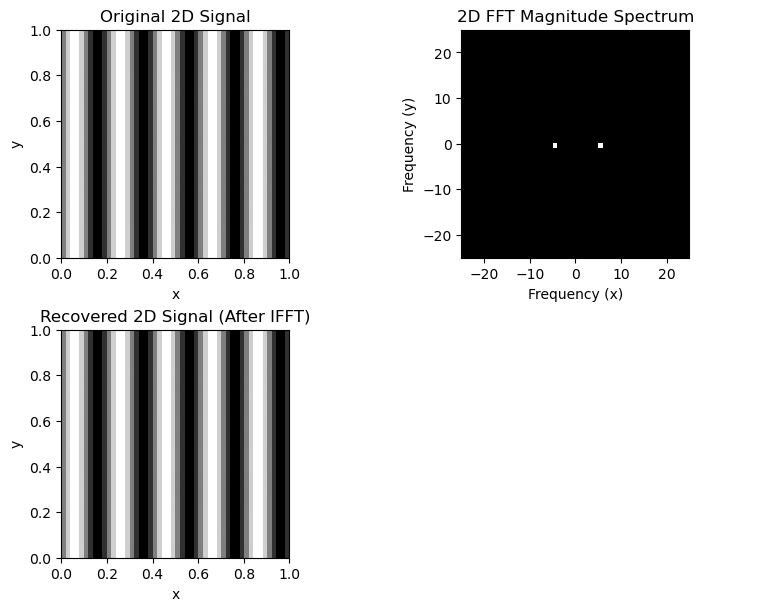

In [51]:
# Define the 2D signal dimensions
rows, cols = 50, 50  # 2D grid size (like an image)
x = np.linspace(0, 1, cols, endpoint=False)  # Time/spatial samples for the columns
y = np.linspace(0, 1, rows, endpoint=False)  # Time/spatial samples for the rows
X, Y = np.meshgrid(x, y)  # Create a 2D mesh grid

# Create a 2D signal composed of two different sine waves
freq1 = 5  # Frequency in the x direction
freq2 = 25  # Frequency in the y direction
signal_2d = 0.5 * np.sin(2.0 * np.pi * freq1 * X) + 1.0 * np.sin(2.0 * np.pi * freq2 * Y)

# Compute the 2D DFT using FFT
fft_values_2d = np.fft.fft2(signal_2d)

# Shift the zero-frequency component to the center for visualization purposes
fft_shifted = np.fft.fftshift(fft_values_2d)

# Compute the magnitude spectrum of the 2D FFT
fft_magnitude = np.abs(fft_shifted)

# Compute the inverse 2D FFT to recover the original signal
recovered_signal_2d = np.fft.ifft2(fft_values_2d).real  # Take only the real part

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(8,6), layout='constrained')

# Plot the original 2D signal
axs[0,0].imshow(signal_2d, cmap='gray', extent=[0, 1, 0, 1])
axs[0,0].set_title('Original 2D Signal')
axs[0,0].set_xlabel('x')
axs[0,0].set_ylabel('y')

# Plot the magnitude spectrum of the 2D FFT (Frequency Domain)
axs[0,1].imshow(np.log(fft_magnitude + 1), cmap='gray', extent=[-cols/2, cols/2, -rows/2, rows/2])
axs[0,1].set_title('2D FFT Magnitude Spectrum')
axs[0,1].set_xlabel('Frequency (x)')
axs[0,1].set_ylabel('Frequency (y)')

# Plot the recovered 2D signal after Inverse FFT
axs[1,0].imshow(recovered_signal_2d, cmap='gray', extent=[0, 1, 0, 1])
axs[1,0].set_title('Recovered 2D Signal (After IFFT)')
axs[1,0].set_xlabel('x')
axs[1,0].set_ylabel('y')

axs[1,1].axis('off')

plt.show()

__Takeaways__

The 2D FFT effectively decomposes a signal into its frequency components, as seen in the bright spots of the magnitude spectrum, which correspond to the sine wave frequencies in the original signal. The inverse FFT successfully reconstructs the original signal, showing that the Fourier Transform and its inverse preserve data accurately. This demonstrates the usefulness of the 2D FFT for analyzing spatial frequencies and reconstructing signals with minimal numerical errors.

## DCT